# Uge 10-13

## Vi har arbejdet med Linær regression og decisionTree. Vi har trænet to modeller med hver fremgangsmåde, og sammenlignet resultatet. 

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load og frasorter Pet data

In [3]:
# 1. Indlæs CSV-fil
file_path = "data/train.csv"
df = pd.read_csv(file_path)

# 2. Undersøg data
print("Raw data:")
print(df.head())  # Se de første rækker
print(df.info())  # Se datatype og manglende værdier

# 3. Definér features (X) og target (y)
X = df.drop(columns=["Pawpularity", "Id"])  # Brug alle kolonner undtagen disse
y = df["Pawpularity"]

# 4. Opdel i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Skalér data (valgfrit, afhængigt af model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Raw data:
                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0

### Træn modellerne

In [4]:
# 6. Træn modellerne
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Decision Tree Regression
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# 7. Evaluér modellerne
print("Model evaluation:")

# Linear Regression
print("\nLinear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))

# Decision Tree Clasiification
print("\nDecision Tree Clasiification:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R^2 Score:", r2_score(y_test, y_pred_tree))

Model evaluation:

Linear Regression:
Mean Absolute Error: 15.696923447732937
Mean Squared Error: 441.08628798486296
R^2 Score: 0.002148004241301571

Decision Tree Clasiification:
Mean Absolute Error: 17.61674230963187
Mean Squared Error: 670.9853756933938
R^2 Score: -0.5179435736246019


### Test Modellerne på testdata

In [5]:
# Load test data
test_file_path = "data/test.csv"
df_test = pd.read_csv(test_file_path)

# Remove non-numeric columns (if applicable)
X_test = df_test.drop(columns=["Id"], errors="ignore")  # Remove "ID" if present

# Scale the test data using the same scaler from training
X_test_scaled = scaler.transform(X_test)  # Reuse the trained scaler

# Make predictions using the trained model
linearpredictions = linear_model.predict(X_test_scaled)
tree_predictions = decision_tree_model.predict(X_test_scaled)

# Display results
df_test["Predicted Pawpularity"] = linearpredictions
print("Linear Regression Predictions:")
print(df_test[["Id", "Predicted Pawpularity"]] if "Id" in df_test.columns else df_test[["Predicted Pawpularity"]])

df_test["Predicted Pawpularity"] = tree_predictions
print("Decision Tree Predictions:")
print(df_test[["Id", "Predicted Pawpularity"]] if "Id" in df_test.columns else df_test[["Predicted Pawpularity"]])





Linear Regression Predictions:
                                 Id  Predicted Pawpularity
0  4128bae22183829d2b5fea10effdb0c3              38.229015
1  43a2262d7738e3d420d453815151079e              36.676497
2  4e429cead1848a298432a0acad014c9d              37.072079
3  80bc3ccafcc51b66303c2c263aa38486              38.057867
4  8f49844c382931444e68dffbe20228f4              38.376631
5  b03f7041962238a7c9d6537e22f9b017              43.750232
6  c978013571258ed6d4637f6e8cc9d6a3              34.806061
7  e0de453c1bffc20c22b072b34b54e50f              35.706968
Decision Tree Predictions:
                                 Id  Predicted Pawpularity
0  4128bae22183829d2b5fea10effdb0c3                     26
1  43a2262d7738e3d420d453815151079e                     25
2  4e429cead1848a298432a0acad014c9d                     18
3  80bc3ccafcc51b66303c2c263aa38486                     24
4  8f49844c382931444e68dffbe20228f4                     28
5  b03f7041962238a7c9d6537e22f9b017                     3

### Visualisering

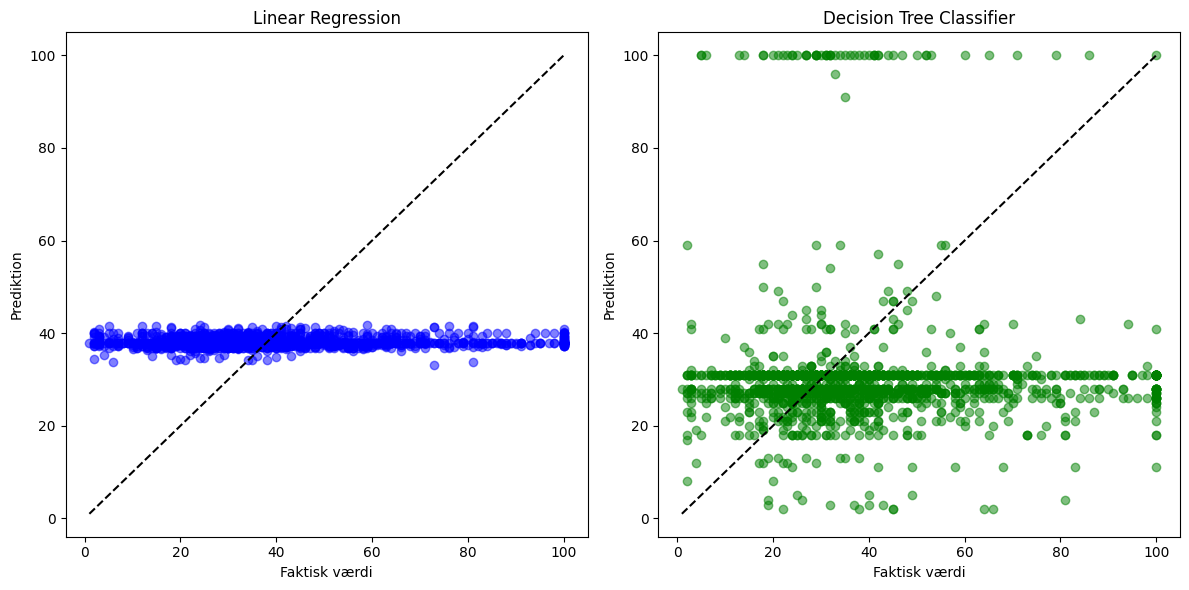

In [6]:
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Faktisk værdi')
plt.ylabel('Prediktion')
plt.title('Linear Regression')

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Faktisk værdi')
plt.ylabel('Prediktion')
plt.title('Decision Tree Classifier')

plt.tight_layout()
plt.show()

# Uge 14

## Principal Component Analasys og Clustering

### Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

### Load and Transform BreastCancer Data

In [55]:
# Load data
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# MinMaxScaler data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA med 2 komponenter
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Andel af varians bevaret:", pca.explained_variance_ratio_)
print("Samlet varians bevaret:", sum(pca.explained_variance_ratio_))

Andel af varians bevaret: [0.53097689 0.1728349 ]
Samlet varians bevaret: 0.7038117901347682


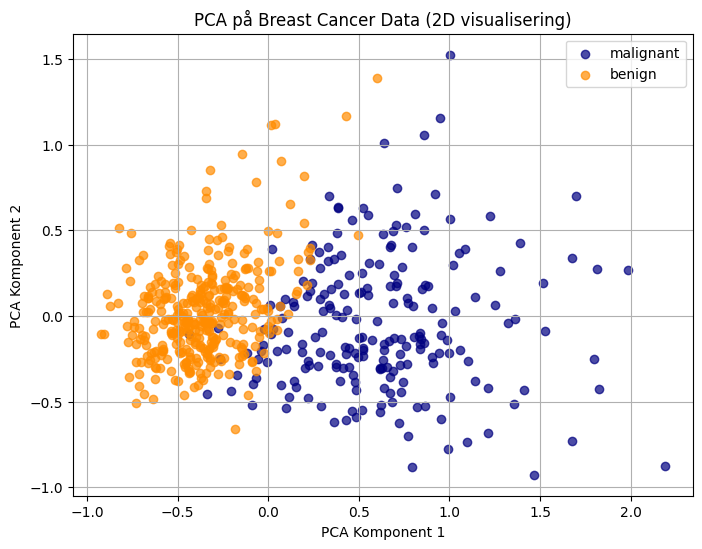

In [56]:
plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_names[i], alpha=0.7, c=color)
plt.xlabel('PCA Komponent 1')
plt.ylabel('PCA Komponent 2')
plt.title('PCA på Breast Cancer Data (2D visualisering)')
plt.legend()
plt.grid(True)
plt.show()

### Agglomerative Clustering

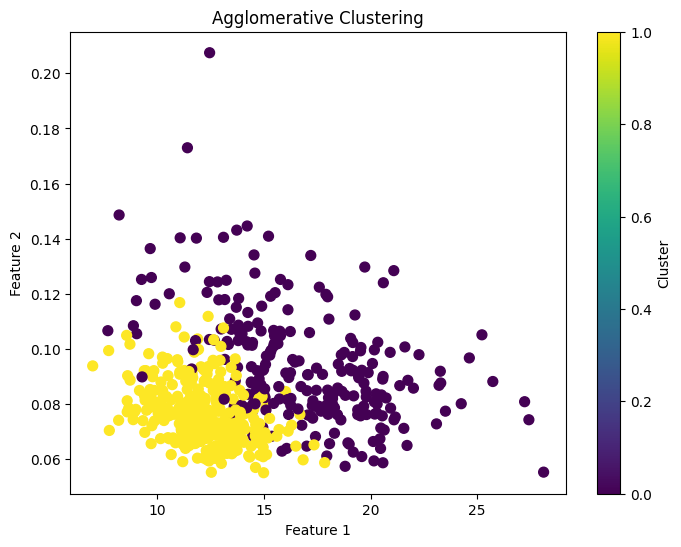

In [57]:
# Agglomerative clustering (2 klasser)
agglo = AgglomerativeClustering(n_clusters=2)
y_cluster = agglo.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,-1], c=y_cluster, cmap='viridis', marker='o', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

### Accuracy score og Confusion Matrix

Accuracy: 0.9050966608084359


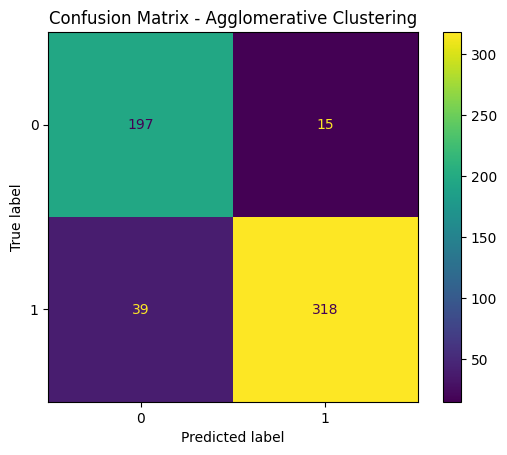

In [64]:
true_labels = y  # Brug de sande labels fra data

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_cluster)
print(f"Accuracy: {accuracy}")

# Confusion matrix (pas evt. på med om labels skal ombyttes)
cm = confusion_matrix(true_labels, y_cluster)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Agglomerative Clustering")
plt.grid(False)
plt.show()

### K-means Clustering og Elbow-method

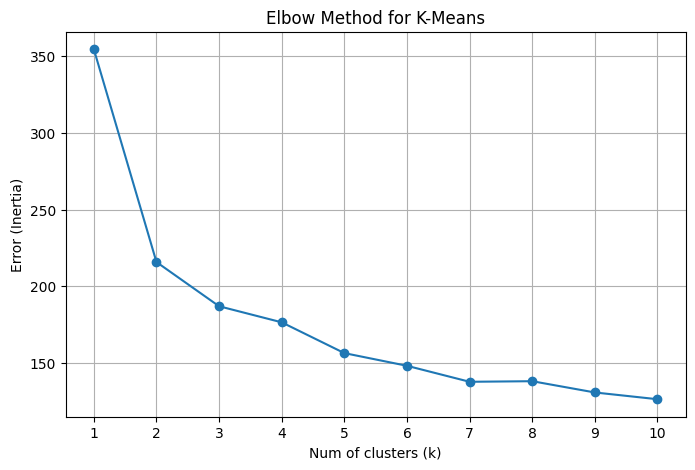

In [42]:
# Find optimal antal klynger (1-10)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Num of clusters (k)')
plt.ylabel('Error (Inertia)')
plt.title('Elbow Method for K-Means')
plt.xticks(k_range)
plt.grid(True)
plt.show()

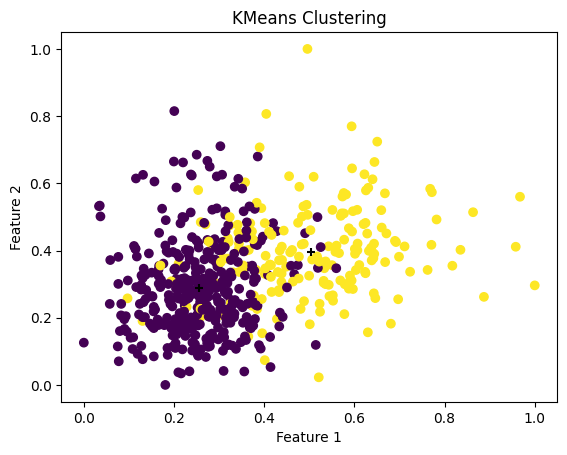

In [49]:
kmeans = KMeans(n_clusters=2)  # Definér KMeans med 2 clusters
y = kmeans.fit_predict(X_scaled)  # Fit modellen til data

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
c='black', marker='+')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Uge 15

## Her arbejdes der med den mest basale form for NN, nemlig Perceptron.
## Der bygges en Perceptron og trænes på breast cancer data samt Pet Data

### Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler

import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

### Load csv data

In [14]:
# 1. Indlæs data
df = pd.read_csv("data/train.csv")
X = df.drop(columns=["Pawpularity", "Id"]).values
y = df["Pawpularity"].values.reshape(-1, 1)

# 2. Split + skalering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Konverter til tensors og DataLoader
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

### NN Model

In [15]:
# 5. Model
modelcsv = nn.Sequential(
    nn.Linear(X.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

### Træning af model

In [16]:
# 6. Træning
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(modelcsv.parameters(), lr=0.01)
epochs = 100
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for xb, yb in train_loader:
        pred = modelcsv(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}")
    losses.append(epoch_loss)

Epoch 1: Loss = 551.8008
Epoch 2: Loss = 427.0580
Epoch 3: Loss = 425.6619
Epoch 4: Loss = 426.2765
Epoch 5: Loss = 424.4817
Epoch 6: Loss = 422.8951
Epoch 7: Loss = 427.4184
Epoch 8: Loss = 426.3254
Epoch 9: Loss = 422.4115
Epoch 10: Loss = 427.6816
Epoch 11: Loss = 423.2013
Epoch 12: Loss = 422.0847
Epoch 13: Loss = 422.9690
Epoch 14: Loss = 423.2081
Epoch 15: Loss = 420.4499
Epoch 16: Loss = 420.6204
Epoch 17: Loss = 422.3669
Epoch 18: Loss = 425.2727
Epoch 19: Loss = 421.6561
Epoch 20: Loss = 420.3457
Epoch 21: Loss = 420.1702
Epoch 22: Loss = 422.3649
Epoch 23: Loss = 419.2516
Epoch 24: Loss = 423.0383
Epoch 25: Loss = 421.3864
Epoch 26: Loss = 425.3096
Epoch 27: Loss = 419.0379
Epoch 28: Loss = 418.1313
Epoch 29: Loss = 419.2298
Epoch 30: Loss = 420.5108
Epoch 31: Loss = 424.9019
Epoch 32: Loss = 419.7331
Epoch 33: Loss = 419.4889
Epoch 34: Loss = 417.7918
Epoch 35: Loss = 418.7658
Epoch 36: Loss = 417.8064
Epoch 37: Loss = 418.3357
Epoch 38: Loss = 419.5545
Epoch 39: Loss = 420.

### Visualisering af loss

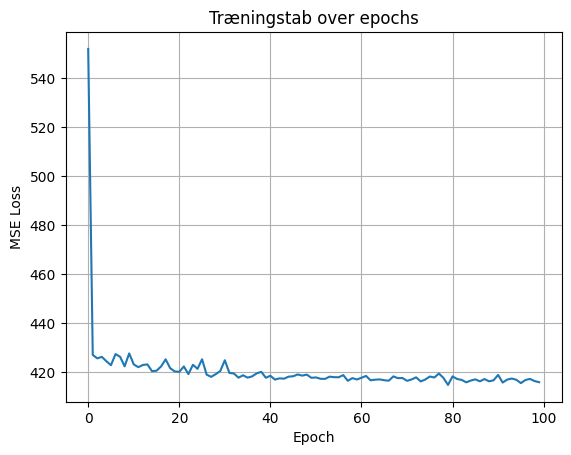

In [17]:
# 7. Visualisering af loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningstab over epochs")
plt.grid(True)
plt.show()

### DataLoad klasse til load af billeder og csv

In [18]:
class PetFinderDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, image_dir, transform=None, max_samples=None):
        self.data = pd.read_csv(csv_file)
        if max_samples is not None:
            self.data = self.data.iloc[:max_samples].reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = f"{self.image_dir}/{row['Id']}.jpg"
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(row["Pawpularity"], dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image.flatten(), label


### Billede transformation

In [19]:
# --- Billedtransformationer ---
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


### Opret dataset

In [20]:
# --- Dataset og DataLoader ---
train_data = PetFinderDataset("data/train.csv", "data/train", transform=transform, max_samples=500)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

### Model

In [21]:
modelPicxCsv = nn.Sequential(
    nn.Linear(3 * 64 * 64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)


### Træn billede model

In [22]:
# --- Træning ---
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(modelPicxCsv.parameters(), lr=0.001)
epochs = 10
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = modelPicxCsv(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    losses.append(epoch_loss)

c:\Users\stamm\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stamm\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Loss: 834.6996
Epoch 2/10, Loss: 506.3563
Epoch 3/10, Loss: 485.8151
Epoch 4/10, Loss: 483.1776
Epoch 5/10, Loss: 484.3957
Epoch 6/10, Loss: 490.0545
Epoch 7/10, Loss: 497.3165
Epoch 8/10, Loss: 486.0989
Epoch 9/10, Loss: 482.2900
Epoch 10/10, Loss: 486.0399


### Visualiser Loss

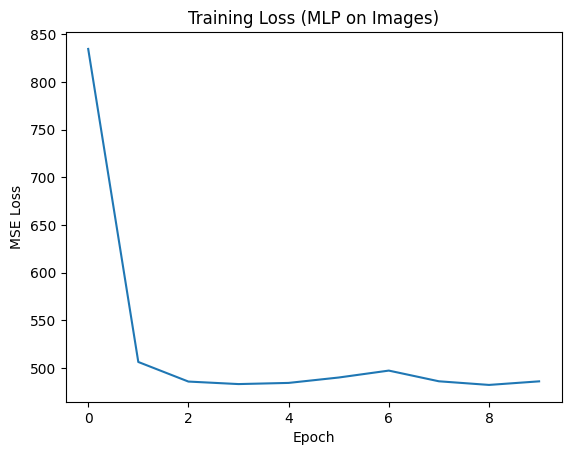

In [23]:
# --- Plot loss over tid ---
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (MLP on Images)")
plt.show()

# Uge 19 

## Her arbejdes med Convolutional Nerual Netwærk på petfinder billederne

### Imports

In [24]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
import random

### Relevant Variables

In [25]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 5

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Import dataset

In [26]:
# Step 1: Load the CSV
df = pd.read_csv("Data/train.csv")  # Path to the CSV file

# Step 2: Set base folder
base_path = "Data/train/"  # Base path for images

# Step 3: Prepare image paths and labels
image_paths = [os.path.join(base_path, f"{id}.jpg") for id in df['Id']]
labels = (df['Pawpularity'] * num_classes // 101).astype(int).tolist()
image_paths = image_paths[:100]  # Limit to 1000 samples for testing

# Dataset class
class PetFinderDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(label, dtype=torch.long)

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomRotation(degrees=66),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard ImageNet normalization
])

# Create dataset and dataloader
train_dataset = PetFinderDataset(image_paths=image_paths, labels=labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

### Creating CNN

In [27]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
    # Determine what layers and their order in CNN object
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dynamically calculate the flattened size
        self.flattened_size = self._get_flattened_size()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def _get_flattened_size(self):
        # Pass a dummy input through the conv layers to calculate the flattened size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 224, 224)  # Batch size 1, 3 channels, 224x224 image
            x = self.conv_layer1(dummy_input)
            x = self.conv_layer2(x)
            x = self.max_pool1(x)
            x = self.conv_layer3(x)
            x = self.conv_layer4(x)
            x = self.max_pool2(x)
            return x.numel()

    # Progresses data across layers
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

### HyperParameter

In [28]:
model = ConvNeuralNet(num_classes)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

# total_step = len(train_loader)

### Træn modellen

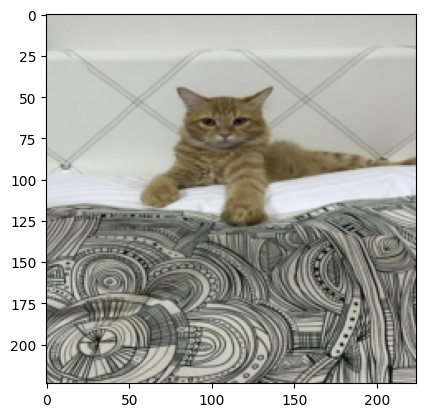

Epoch [1/5], Loss: 2.3036


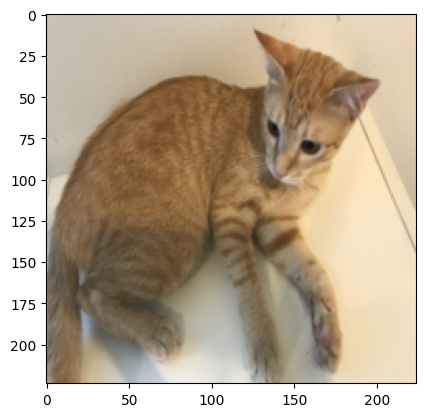

Epoch [2/5], Loss: 2.1700


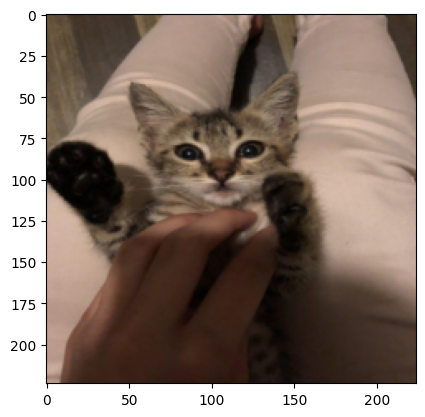

Epoch [3/5], Loss: 2.1492


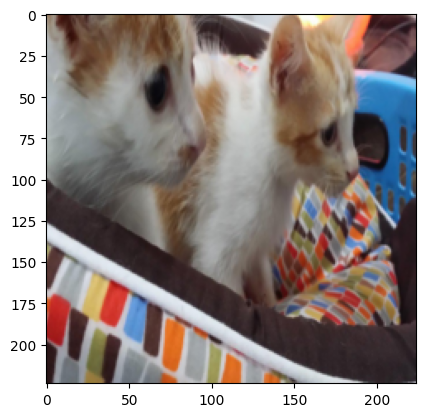

Epoch [4/5], Loss: 2.2892


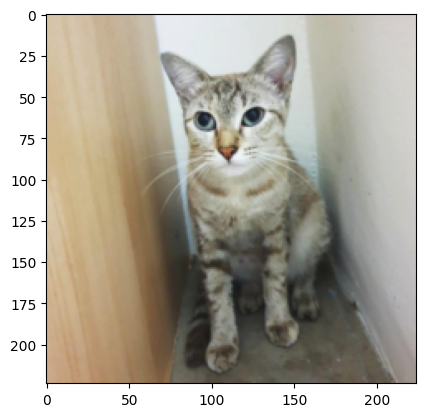

Epoch [5/5], Loss: 1.9627


In [29]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
# Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    idx = random.randint(0, images.size(0) - 1)
    plt.imshow(images[idx].cpu().numpy().transpose(1, 2, 0))
    plt.show()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    

### Test Modellen

In [30]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(image_paths), 100 * correct / total))

Accuracy of the network on the 100 train images: 24.0 %


# Uge 20 + 21

## her arbejder vi med recurrent neural network

Imports og klargøring af data

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Load og skaler data
data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# RNN kræver 3D input: (samples, sequence_length, features)
X_seq = X_scaled.reshape((X_scaled.shape[0], 10, 3))  # 10 timesteps à 3 features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Konverter til tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


Definer RNN-modller (LSTM og GRU)

In [32]:
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, rnn_type="LSTM"):
        super(RNNClassifier, self).__init__()
        self.rnn_type = rnn_type
        if rnn_type == "LSTM":
            self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        elif rnn_type == "GRU":
            self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        else:
            raise ValueError("Vælg enten 'LSTM' eller 'GRU'")
        
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # brug sidste tidssteg
        out = self.fc(out)
        return self.sigmoid(out)


Trænings- og evalueringsfunktion

In [33]:
def train_model(model, train_loader, epochs=20, lr=0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {correct / total:.2f}")


Træn og evaluer LSTM og GRU

In [34]:
for rnn_type in ["LSTM", "GRU"]:
    print(f"\nTræner {rnn_type} model:")
    model = RNNClassifier(input_size=3, hidden_size=32, rnn_type=rnn_type)
    train_model(model, train_loader, epochs=20)
    evaluate_model(model, test_loader)



Træner LSTM model:
Epoch 1, Loss: 20.0062
Epoch 2, Loss: 19.1880
Epoch 3, Loss: 17.5799
Epoch 4, Loss: 13.3733
Epoch 5, Loss: 9.9061
Epoch 6, Loss: 9.2342
Epoch 7, Loss: 8.1404
Epoch 8, Loss: 7.9145
Epoch 9, Loss: 6.9204
Epoch 10, Loss: 6.5806
Epoch 11, Loss: 6.4162
Epoch 12, Loss: 6.5889
Epoch 13, Loss: 6.7435
Epoch 14, Loss: 5.9918
Epoch 15, Loss: 5.8176
Epoch 16, Loss: 6.6584
Epoch 17, Loss: 6.0336
Epoch 18, Loss: 5.9368
Epoch 19, Loss: 5.9493
Epoch 20, Loss: 5.8430
Test Accuracy: 0.95

Træner GRU model:
Epoch 1, Loss: 19.9762
Epoch 2, Loss: 19.3416
Epoch 3, Loss: 18.3805
Epoch 4, Loss: 15.2751
Epoch 5, Loss: 9.3768
Epoch 6, Loss: 7.7233
Epoch 7, Loss: 7.7051
Epoch 8, Loss: 7.0377
Epoch 9, Loss: 6.5535
Epoch 10, Loss: 6.2853
Epoch 11, Loss: 6.3643
Epoch 12, Loss: 6.7760
Epoch 13, Loss: 6.2671
Epoch 14, Loss: 6.3718
Epoch 15, Loss: 5.8472
Epoch 16, Loss: 6.0463
Epoch 17, Loss: 6.5618
Epoch 18, Loss: 5.9243
Epoch 19, Loss: 5.6421
Epoch 20, Loss: 6.3546
Test Accuracy: 0.94


Ny patient test

In [35]:
new_patient = torch.tensor(X_test[0].reshape(1, 10, 3), dtype=torch.float32)
model.eval()
with torch.no_grad():
    output = model(new_patient)
    prediction = "Kræft" if output.item() > 0.5 else "Rask"
    print("Forudsigelse:", prediction)


Forudsigelse: Kræft
